# Introduction to Image Processing

Guillaume Lemaitre - Fabrice Meriaudeau

## Lecture 3 - Fourier Transform and Frequency Filtering

The needed libraries are imported in the cell below

In [1]:
%matplotlib inline
%pprint off

# Import the library to show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Other plotting library
#import seaborn as sns
#sns.set()

# Import the library to manage matrix and array
import numpy as np

# Import the library of linear algebra
import scipy as sp
# Import the module to write some sound
from scipy.io import wavfile
from scipy import fftpack

# Import the image processing toolbox
### Module to read, write, etc.
from skimage import io
### Module for color conversion
from skimage import color
### Function to convert the image on 8 bits
from skimage import img_as_ubyte
### Module to transform images
from skimage import exposure
### Module to apply the filter
from skimage import filters
from skimage.filters import rank
from skimage import transform

Pretty printing has been turned OFF


### Introduction to Fourier Transform

Let's generate a sine signal and save inside a wave file in order to listen to eat

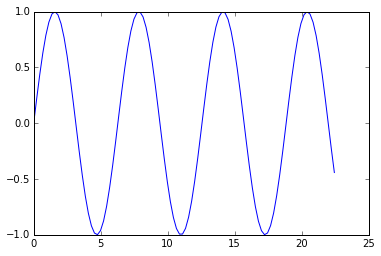

In [2]:
x = np.linspace(0, 100000, num=44100*10)
data = np.sin(x)
scaled = np.int16(data/np.max(np.abs(data)) * 32767)
wavfile.write('sound/test.wav', 44100, scaled)

plt.plot(x[0:100], data[0:100])

Compute the Fourier transform and display the module

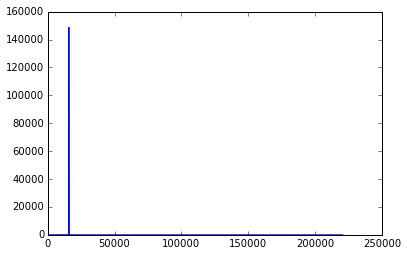

In [3]:
# Compute the continuous Fourier Transform
data_fft = np.fft.rfft(data)

plt.plot(np.abs(data_fft))

The pick occurs at the frequency of the sine wave. Now let's mix different signal.

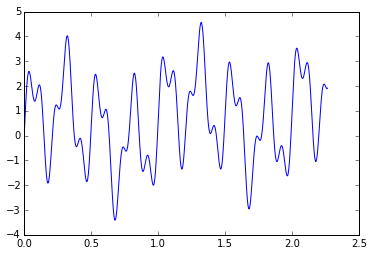

In [4]:
x = np.linspace(0, 1000, num=441000)
data = np.sin(2*np.pi*x) + np.sin(2*np.pi*.1*x) + 2*np.sin(2*np.pi*4*x) + np.sin(2*np.pi*10*x)
scaled = np.int16(data/np.max(np.abs(data)) * 32767)
wavfile.write('sound/test2.wav', 44100, scaled)

plt.plot(x[0:1000], data[0:1000])

We can repeat the same decomposition

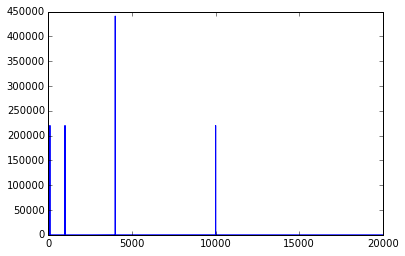

In [5]:
# Compute the continuous Fourier Transform
data_fft = np.fft.rfft(data)

plt.plot(np.abs(data_fft[0:20000]))

Let's read a real file

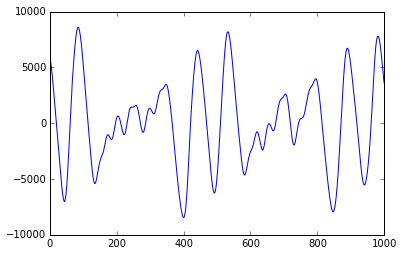

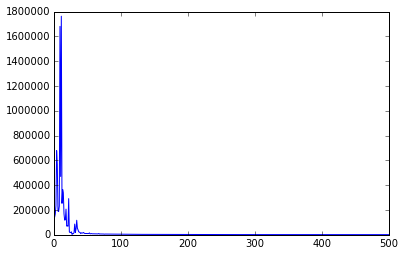

In [6]:
# Read the full file
_, data = wavfile.read('./sound/The-Album-Leaf-TwentyTwoFourteen.wav')
# Select a piece of it
data = data[300000:301000, 0]

plt.figure()
plt.plot(data)

# Compute the continuous Fourier Transform
data_fft = np.fft.rfft(data)

plt.figure()
plt.plot(np.abs(data_fft))

### Discrete Fourier Transform

Create a synthetic image

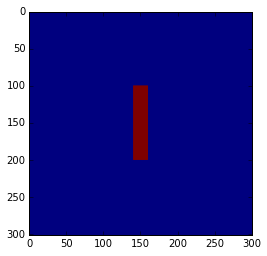

In [7]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[100:200, 140:160] = 255

plt.figure()
plt.imshow(img)

We can compute the fft using numpy

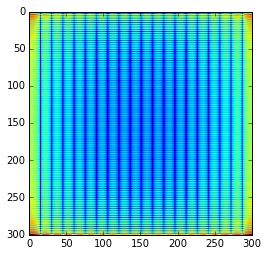

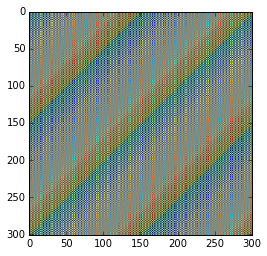

In [8]:
# Compute the DFT
img_freq = np.fft.fft2(img)

# We can show the magnitude and the phase
plt.figure()
plt.imshow(exposure.adjust_log(np.abs(img_freq)))
plt.figure()
plt.imshow(np.angle(img_freq))

The DFT can be shifted to center it in the middle of the image 

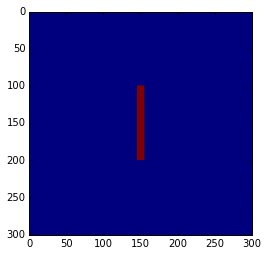

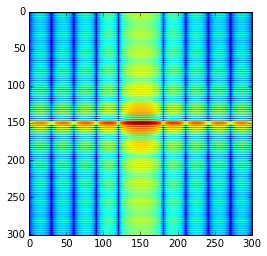

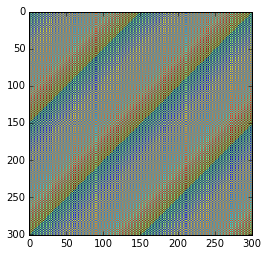

In [9]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[100:200, 145:155] = 255

plt.figure()
plt.imshow(img)

# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img))

# We can show the magnitude and the phase
plt.figure()
plt.imshow(exposure.adjust_log(np.abs(img_freq)))
plt.figure()
plt.imshow(np.angle(img_freq))

### Magnitude and phase influence

/home/lemaitre/anaconda/lib/python2.7/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


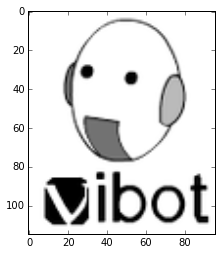

In [10]:
# Define the image to read
filename = 'images/vibot.png'

# Open an image
img = io.imread(filename)
# Convert the image into grayscale
img = color.rgb2gray(img)
# Convert the image into 8 bits
img = img_as_ubyte(img)

max_img = 255

# Show the image with grey colormap
plt.figure()
plt.imshow(img, cmap = cm.Greys_r)
plt.show()

Lets' compute the DFT and show the magnitude and phase spectrum

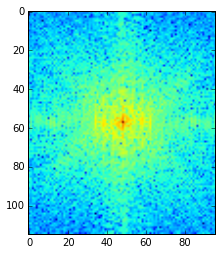

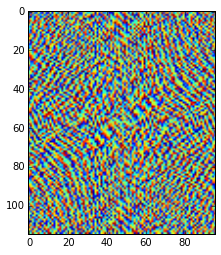

In [11]:
# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img))

# We can show the magnitude and the phase
plt.figure()
plt.imshow(exposure.adjust_log(np.abs(img_freq)))
plt.figure()
plt.imshow(np.angle(img_freq))

Let's try to remove the phase and the phase and make the reconstruction

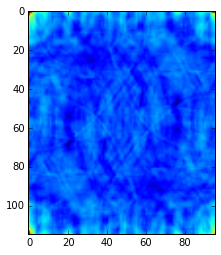

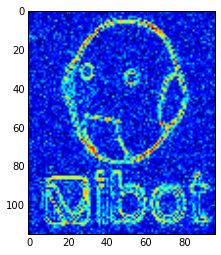

In [12]:
# Compute the module and the phase
phase_img_freq = np.angle(img_freq)
mag_img_freq = np.abs(img_freq)

# Compute the image back with no phase
img_no_phase = np.abs(np.fft.ifft2(mag_img_freq))

plt.figure()
plt.imshow(exposure.adjust_log(np.abs(img_no_phase)))

# Compute the image back with no magnitude
mag_img_freq[:, :] = 80
img_no_mag = np.abs(np.fft.ifft2(mag_img_freq*np.exp(1j*phase_img_freq)))

plt.figure()
plt.imshow(exposure.adjust_log(np.abs(img_no_mag)))

### Translation and rotation

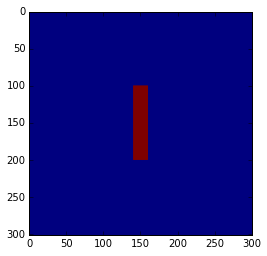

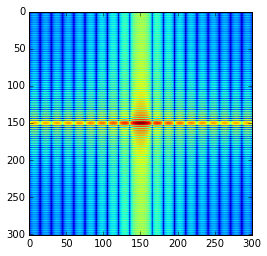

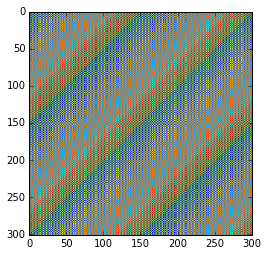

In [13]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[100:200, 140:160] = 255

plt.figure()
plt.imshow(img)

# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img))

# We can show the magnitude and the phase
plt.figure()
plt.imshow(exposure.adjust_log(np.abs(img_freq)))
plt.figure()
plt.imshow(np.angle(img_freq))

Make a translation and see the changes

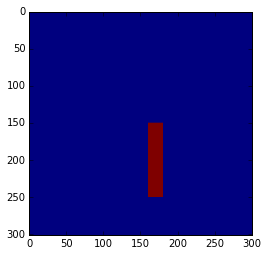

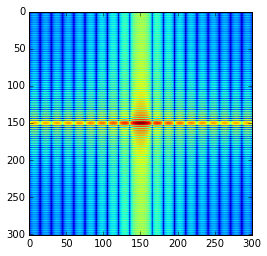

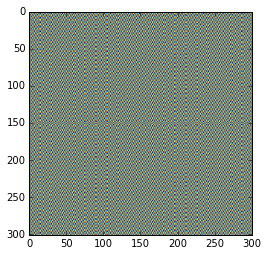

In [14]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[150:250, 160:180] = 255

plt.figure()
plt.imshow(img)

# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img))

# We can show the magnitude and the phase
plt.figure()
plt.imshow(exposure.adjust_log(np.abs(img_freq)))
plt.figure()
plt.imshow(np.angle(img_freq))

Make a rotation and observe

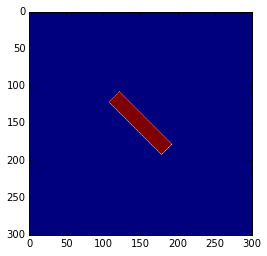

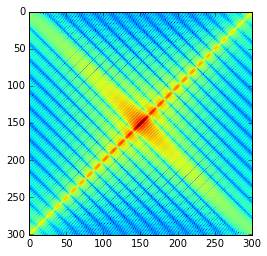

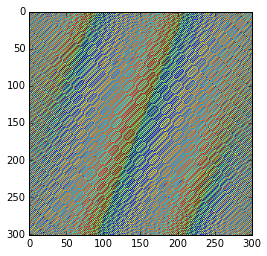

In [15]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[100:200, 140:160] = 255

img = transform.rotate(img, 45)

plt.figure()
plt.imshow(img)

# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img))

# We can show the magnitude and the phase
plt.figure()
plt.imshow(exposure.adjust_log(np.abs(img_freq)))
plt.figure()
plt.imshow(np.angle(img_freq))

Make two bars now

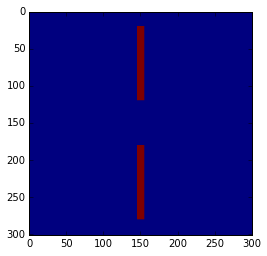

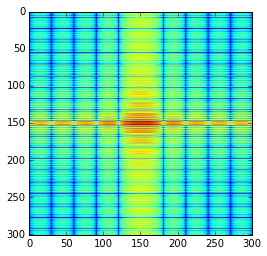

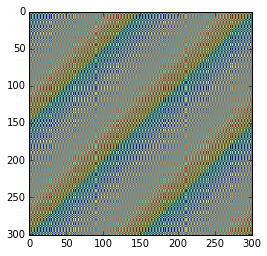

In [16]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[20:120, 145:155] = 255
img[180:280, 145:155] = 255

plt.figure()
plt.imshow(img)

# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img))

# We can show the magnitude and the phase
plt.figure()
plt.imshow(exposure.adjust_log(np.abs(img_freq)))
plt.figure()
plt.imshow(np.angle(img_freq))

### Original image

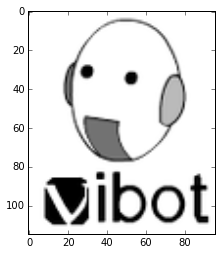

In [17]:
# Define the image to read
filename = 'images/vibot.png'

# Open an image
img = io.imread(filename)
# Convert the image into grayscale
img = color.rgb2gray(img)
# Convert the image into 8 bits
img = img_as_ubyte(img)

max_img = 255

# Show the image with grey colormap
plt.figure()
plt.imshow(img, cmap = cm.Greys_r)
plt.show()

### Filtering

#### Construction of a frequency filter from a given spatial filter 

In order to build a frequency filter $H(u,v)$ from its spatial counterpart $h(x,y)$, we need to:

1. Build a zero padded spatial filter $h_p(x,y)$
1. Shift $h_p(x,y)$ by $(-1)^{x+y}$
1. Compute the DFT to obtain $H(u,v)$
1. Shift $H(u,v)$ by $(-1)^{x+y}$

In [18]:
def build_frequency_filter(h, sz_h_p):
    ###--- 1. Build a zero padded spatial filter $h_p(x,y)$ ---###
    # Create the zero padded spatial filter
    h_p = np.zeros(sz_h_p)
    # Find the center of the zero padded
    ctr_h_p = np.divide(sz_h_p, 2)
    # Assign the original filter
    h_p[ctr_h_p[0]:ctr_h_p[0] + np.size(h, 0),
        ctr_h_p[1]:ctr_h_p[1] + np.size(h, 1)] = h
    
    ###--- 2. Shift $h_p(x,y)$ by $(-1)^{x+y}$ ---###
    h_p_shifted = np.fft.fftshift(h_p)
    
    ###--- 3. Compute the DFT ---###
    H = np.fft.fft2(h_p_shifted)
    
    ###--- 4. Shift $H_p(u,v)$ by $(-1)^{x+y}$ ---###
    H_shifted = np.fft.fftshift(H)
    
    return H_shifted

#### Zero padding for image

In order to aboid the wraparound error, the image need to be zero padded

The size of the new image needs to be determined first

In [19]:
def find_padding_size(img, h):
    # Get the size of the patch
    h_sz = h.shape
    img_sz = img.shape
    
    # Compute the future size
    height_pad = h_sz[0] + img_sz[0] - 1
    width_pad = h_sz[1] + img_sz[1] - 1
    
    if not (np.mod(height_pad, 2) == 1):
        height_pad = height_pad + 1
    if not (np.mod(width_pad, 2) == 1):
        width_pad = width_pad + 1
        
    future_size = (height_pad, width_pad)
        
    return future_size

Then, we can pad the image

In [20]:
def img_padding(img, sz_img):
    # Initialise and pad the image with zero
    img_p = np.zeros(sz_img)
    img_p[0:np.size(img, 0), 0:np.size(img, 1)] = img
    
    return img_p

#### Filtering processing

In order to perform the filtering, we need to:

1. Find the padded image size
1. Pad the image
1. Convert the spatial filter to frequency filter
1. Compute the DFT of the image with additional shift
1. Apply the multiplication in the Fourier space
1. Compute the inverse Fourier transform
1. Crop the image at its original size

In [21]:
def filtering_freq(img, filt_sp, verbose=True):
    
    ###--- 1. Find the size of the padded image ---#
    sz_img = find_padding_size(img, filt_sp)
    
    ###--- 2. Pad the image ---###
    img_p = img_padding(img, sz_img)
    if (verbose):
        plt.figure()
        io.imshow(img_p)
    
    ###--- 3. Compute the frequency filter ---###
    filter_freq = build_frequency_filter(filt_sp, sz_img)
    # We can keep only the imaginary part of the filter
    filter_freq = np.zeros(sz_img) + 1j * np.imag(filter_freq)
    if (verbose):
        plt.figure()
        io.imshow(exposure.adjust_log(np.abs(filter_freq)))
    
    ###--- 4. Compute the DFT of the image with additional shift ---###
    img_freq = np.fft.fftshift(np.fft.fft2(img_p))
    if (verbose):
        plt.figure()
        io.imshow(exposure.adjust_log(np.abs(img_freq)))
    
    ###--- 5. Apply the multiplication in the Fourier space ---###
    img_filt_freq = img_freq * filter_freq
    if (verbose):
        plt.figure()
        io.imshow(exposure.adjust_log(np.abs(img_filt_freq)))
    
    ###--- 6. Compute the inverse Fourier transform ---###
    img_filt_sp_p = np.fft.ifft2(np.fft.fftshift(img_filt_freq))
    
    ###--- 7. Crop the image at its original size ---###
    return img_filt_sp_p[0:img.shape[0], 0:img.shape[1]]

/home/lemaitre/anaconda/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warnings.warn("Float image out of standard range; displaying "


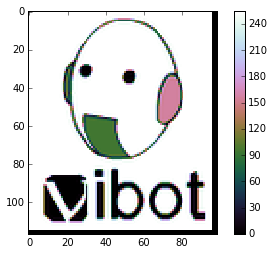

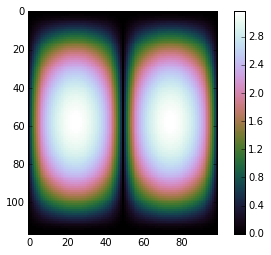

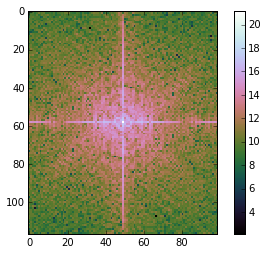

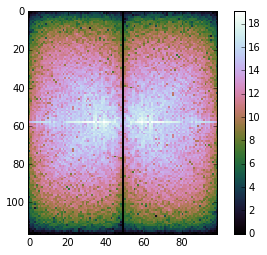

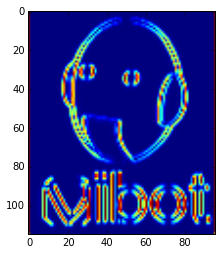

In [22]:
sobel_y_spat = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]).T

result_img = filtering_freq(img, sobel_y_spat)

plt.figure()
plt.imshow(np.abs(result_img))

### Filters

#### Notch filter

Notch filter consists in removing the DC such that $F(0,0) = 0$

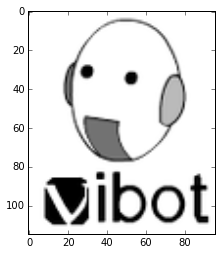

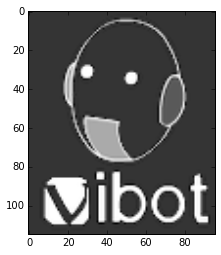

In [23]:
# Define the image to read
filename = 'images/vibot.png'

# Open an image
img = io.imread(filename)
# Convert the image into grayscale
img = color.rgb2gray(img)
# Convert the image into 8 bits
img = img_as_ubyte(img)

# Show the image with grey colormap
plt.figure()
plt.imshow(img, cmap = cm.Greys_r)
plt.show()

# Compute the DFT
img_freq = np.fft.fft2(img)
img_freq[0, 0] = 0

# Convert back
img = np.abs(np.fft.ifft2(img_freq))

plt.figure()
plt.imshow(img, cmap = cm.Greys_r)

#### Laplacian filter

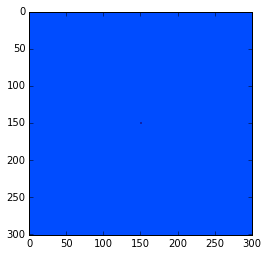

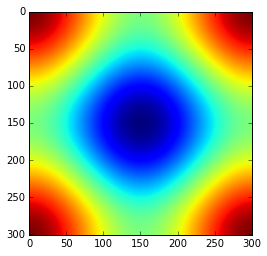

In [24]:
laplacian = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

# Zero pad the filter
laplacian_p = np.zeros((301, 301))
### Find the center of the image
cen_fil = (301 - 1)/2
laplacian_p[cen_fil-1:cen_fil+2, cen_fil-1:cen_fil+2] = laplacian

plt.figure()
plt.imshow(laplacian_p)

# Apply the shift to the filter
laplacian_freq = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(laplacian_p)))

plt.figure()
plt.imshow(np.abs(laplacian_freq))